# Foundations of Data Science
## Homework 2

Student Name: Pruthviraj R Patil

Student Netid:prp7650
***

### Part 1: Case study (5 Points)
- Read [this article](http://www.nytimes.com/2012/02/19/magazine/shopping-habits.html) in the New York Times.
- Use what we've learned in class and from the book to describe how one could set Target's problem up as a predictive modeling problem, such that they could have gotten the results that they did.  Formulate your solution as a proposed plan using our data science terminology.  Include aspects of the Data Science Workflow that you see as relevant to solving the problem.  Be precise but concise.

#### About the Article:

The main aim of the Target's problem is to build a prediction model that tells if the customer is pregnant then how many months are they yet to concieve the baby so that they can target their offers to them in time. Also, the AOI is to know if the user likes the particular product or not. So, for that, the mentality of the customer is taken into consideration by thinking that their habits of purchasing stuffs like diapers will increase as they near to their due date. Also, the type of product they may like can be predicted by several factors like the prices of product they bought, their socioeconomic level, etc. 

This information if customers are actually pregnent, if yes then what kind of product they bought recently can be taken from the "baby shower registry". This is where customers have willingly shared their information pertaining to their pregenency. The final outcome will be a proper ETA(Extract Transform Analyse) data pipeline.

1. First, begin the ETA data pipeline building by collecting the data as discussed above. Target also buys data like ethnicity, socio-economic from other data sources.  

2. Further, do the following steps:
    a. The current data has to be merged with the external data bought. For that, data integration has to be done using outer join based on the user name as the primary key. This can be done by using some proper feasible external softwares.
    b. In the case of Transforming, we do the data engineering, checking if there are any null values, if yes, then impute them or remove them based on the columns. 
    c. Further, use PCA/SVD (based on the situation) for feature engineering and get the proper features for predicting the total months needed.
    d. The data has to be split into Train, Validation and Testing data.
    
3. In the case of Analysis, the main part is to choose the proper data model. To predict another model that predicts if the user likes the particular product, the binary classifier has to be formed associated with every product indexing the users. This can be done by using classifier models like decision trees, logistic regression, or SVM etc over the existing data. The hyperparameter tuing can easily be done by utilizing the Grid Search technology.

4. The final part will be the evaluation will be analysis of predicted data from the trained model over the test data. The model can also be improved by using k-Fold Cross validation too.


### Part 2: Exploring data in the command line (4 Points - 1 Point Each)
For this part we will be using the data file located in `"data/loansData.csv"`. This file consists of records that pertain to some loan records in a local bank. There are 15 comma separated columns in this order: 

`CustNUm`, `Amount.Requested`,	`Amount.Funded.By.Investors`,	`Interest.Rate`,	`Loan.Length`,	`Loan.Purpose`,	`Debt.To.Income.Ratio`,	`State`,	`Home.Ownership`,	`Monthly.Income`,	`FICO.Range`,	`Open.CREDIT.Lines`,	`Revolving.CREDIT.Balance`,	`Inquiries.in.the.Last.6.Months`, and	`Employment.Length`. 

These fields contain data of type `int`, `float`, and `string`, and you can also locate a file `"data/loansData_columns.csv"`in the data folder containing all the column names for easy reference.  Answer the following questions using Linux/Unix bash commands. All questions can be answered in one line (sometimes, with pipes)! Some questions will have many possible solutions. Don't forget that in iPython notebooks you must prefix all bash commands with an exclamation point, i.e. `"!command arguments"`.

1\. How many records (lines) are in this file?

In [1]:
# Place your code here
!wc -l < data/loansData.csv

    2499


2\. How many unique `State` (the 8th field) are in this file? (hint: consider the 'cut' command and use pipe operator '|')

In [2]:
# Place your code here
!cut -d "," -f 8 data/loansData.csv |sort|uniq -c|wc -l

      46


3\. Rank all domains by the number of `Loan.Purpose` (the 6th field) they requested in descending order. (hint: consider the 'cut', 'uniq' and 'sort' commands and the pipe operator).

In [3]:
# Place your code here
!cut -d "," -f 6 data/loansData.csv|sort|uniq -c|sort -r

1307 debt_consolidation
 444 credit_card
 201 other
 152 home_improvement
 101 major_purchase
  87 small_business
  50 car
  39 wedding
  30 medical
  29 moving
  21 vacation
  20 house
  15 educational
   4 renewable_energy


4\. List all records which have `FICO.Range` (the 11th field) from 815-819. (hint: this can be done using 'grep')

In [4]:
# Place your code here
!grep -w "81[5-9]" data/loansData.csv

### Part 3: Dealing with data Pythonically (16 Points)

In [5]:
# You might find these packages useful. You may import any others you want!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timeit

1\. (1 Point) Load the data set `"data/ads_dataset.tsv"` and load it into a Python Pandas data frame called `ads`.

In [6]:
# Place your code here
ads=pd.read_csv('data/ads_dataset.tsv', sep='\t')
ads.head()

,is_video_user,video_freq,call_freq,video_interval,call_interval,expected_video_time,expected_call_time,last_bill,next_bill,multiple_video,multiple_carrier,uniq_urls,num_texts,is_churn
0,0,NaN,1,0,0.0,0,0.0000,106,106,0,0,169,2130,0
1,0,NaN,1,0,0.0,0,0.0000,72,72,0,0,154,1100,0
2,0,NaN,1,0,0.0,0,0.0000,5,5,0,0,4,12,0
3,0,NaN,1,0,0.0,0,0.0000,6,6,0,0,150,539,0
4,0,NaN,2,0,0.5,0,-101.1493,101,101,0,1,103,362,0


2\. (4 Points) Write a Python function called `getDfSummary()` that does the following:
- Takes as input a data frame
- For each variable in the data frame calculates the following features:
  - `number_nan` to count the number of missing not-a-number values
  - Ignoring missing, NA, and Null values:
    - `number_distinct` to count the number of distinct values a variable can take on
    - `mean`, `max`, `min`, `std` (standard deviation), and `25%`, `50%`, `75%` to correspond to the appropriate percentiles
- All of these new features should be loaded in a new data frame. Each row of the data frame should be a variable from the input data frame, and the columns should be the new summary features.
- Returns this new data frame containing all of the summary information

Hint: The pandas `describe()` [(manual page)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method returns a useful series of values that can be used here.

In [7]:
def getDfSummary(input_data):
    # number_nan = calculates number of NaN values in each column
    cols=list(input_data.columns)
    #init the col values as lists first
    nan_vals=[]
    num_distinct=[]
    mean=[]
    max_col=[]
    min_col=[]
    std=[]
    percent_25=[]
    percent_50=[]
    percent_75=[]
    #for every column, get the statistical measures
    for col in cols:
        nan_vals.append(input_data[col].isna().sum())
        #first get the column with no Null Vals
        current_col=list(input_data[input_data[col].notnull()][col])
        current_col=pd.Series(data=current_col)
        #describe the col
        desc_col=current_col.describe()
        #calculate the number distinct values in the column
        num_distinct.append(len(current_col.unique()))
        #calculate mean
        mean.append(desc_col[1])
        #calculate max
        max_col.append(desc_col[7])
        #calculate min
        min_col.append(desc_col[3])
        #calculate std
        std.append(desc_col[2])
        #calculate 25%
        percent_25.append(desc_col[4])
        #calculate 50%
        percent_50.append(desc_col[5])
        #calculate 75%
        percent_75.append(desc_col[6])
    
    #populate all the data
    output_data=pd.DataFrame()
    output_data['number_nan']=nan_vals
    output_data['number_distinct']=num_distinct
    output_data['mean']=mean
    output_data['max']=max_col
    output_data['min']=min_col
    output_data['std']=std
    output_data['25%']=percent_25
    output_data['50%']=percent_50
    output_data['75%']=percent_75
    output_data.index=cols
    
    #return the description table created
    return output_data

3\. (1 Point) How long does it take for your `getDfSummary()` function to work on your `ads` data frame? Show us the results below.

Hint: `%timeit getDfSummary(ads)`

In [8]:
# Place your code here
s=timeit.timeit()
summary_without_nan=getDfSummary(ads)
e=timeit.timeit()
print("Time taken to run the getDfSummary Function is: "+ str(s-e))
summary_without_nan

Time taken to run the getDfSummary Function is: 0.0003077079999997956


,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
is_video_user,0,2,0.042632,1.00000,0.0000,0.202027,0.0,0.0,0.000000
video_freq,52257,10,1.240653,15.00000,1.0000,0.782228,1.0,1.0,1.000000
call_freq,0,64,1.852777,84.00000,0.0000,2.921820,1.0,1.0,2.000000
video_interval,0,121,2.570533,120.00000,0.0000,14.162418,0.0,0.0,0.000000
call_interval,0,5886,5.825610,184.91670,0.0000,17.595442,0.0,0.0,0.104167
expected_video_time,0,134,-0.494174,55.00000,-78.0000,8.411089,0.0,0.0,0.000000
expected_call_time,0,15135,-10.210786,91.40192,-187.6156,31.879722,0.0,0.0,0.000000
last_bill,0,189,64.729335,188.00000,0.0000,53.476658,18.0,51.0,105.000000
next_bill,0,189,64.729335,188.00000,0.0000,53.476658,18.0,51.0,105.000000
multiple_video,0,2,0.021563,1.00000,0.0000,0.145253,0.0,0.0,0.000000


4\. (2 Points) Using the results returned from `getDfSummary()`, which fields, if any, contain missing `NaN` values?

In [9]:
# Place your code here
summary_with_nan=getDfSummary(ads)
summary_with_nan.loc[(summary_with_nan['number_nan']>0)]

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
video_freq,52257,10,1.240653,15.0,1.0,0.782228,1.0,1.0,1.0


5\. (4 Points) For the fields with missing values, does it look like the data is missing at random? Are there any other fields that correlate perfectly, or predict that the data is missing? If missing, what should the data value be?

Hint: create another data frame that has just the records with a missing value. Get a summary of this data frame using `getDfSummary()` and compare the differences. Do some feature distributions change dramatically?



#### Response:

My Observation:
    In the case of data frame where there is no null values, the unique values pertaining to 'is_video_user' is one (whose value=1). Whereas, in the case of dataset with only null values in the 'video_freq' column, the unique values in the 'is_video_user' is exactly opposite to the former case (i.e. value=0). Also, in the case of dataset with null values in the 'video_freq' column, the 'expected_video_time' is 0. So, these two variables can be used to say that if the data is missing, the value of the date has to be 0 and these variables correlate to conclude so.

In [10]:
ads_na = ads.dropna(how='any',axis=0)
ads_na.shape
print("THIS IS THE DATASET DESCRIPTION WITH NO NULL VALUES")
getDfSummary(ads_na)

THIS IS THE DATASET DESCRIPTION WITH NO NULL VALUES


,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
is_video_user,0,1,1.000000,1.00000,1.0000,0.000000,1.000000,1.000000,1.00000
video_freq,0,10,1.240653,15.00000,1.0000,0.782228,1.000000,1.000000,1.00000
call_freq,0,60,6.371723,75.00000,0.0000,8.680026,2.000000,3.000000,7.00000
video_interval,0,121,60.296519,120.00000,0.0000,34.994173,29.500000,61.000000,91.00000
call_interval,0,1367,8.952092,176.70830,0.0000,16.651559,0.041667,3.354167,10.83333
expected_video_time,0,134,-11.591749,55.00000,-78.0000,39.134039,-46.000000,-11.000000,23.00000
expected_call_time,0,1788,-22.370870,88.30038,-183.3626,42.080323,-34.575625,-1.504768,0.00000
last_bill,0,186,42.003438,186.00000,0.0000,47.980703,3.000000,21.000000,70.00000
next_bill,0,186,42.003438,186.00000,0.0000,47.980703,3.000000,21.000000,70.00000
multiple_video,0,2,0.505801,1.00000,0.0000,0.500074,0.000000,1.000000,1.00000


In [11]:
ads_wna=ads[ads['video_freq'].isna()]
ads_wna.shape
print('THIS IS THE DESCRIPTION OF DATASET WITH NULL VALUES IN VIDEO_FREQ COLUMN')
getDfSummary(ads_wna)

THIS IS THE DESCRIPTION OF DATASET WITH NULL VALUES IN VIDEO_FREQ COLUMN


<ipython-input-7-87c2b490287c>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  current_col=pd.Series(data=current_col)


,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
is_video_user,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000
video_freq,52257,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_freq,0,48,1.651549,84.00000,1.0000,2.147955,1.0,1.0,2.000000
video_interval,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000
call_interval,0,5112,5.686388,184.91670,0.0000,17.623555,0.0,0.0,0.041667
expected_video_time,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000
expected_call_time,0,13351,-9.669298,91.40192,-187.6156,31.239030,0.0,0.0,0.000000
last_bill,0,189,65.741317,188.00000,0.0000,53.484622,19.0,52.0,106.000000
next_bill,0,189,65.741317,188.00000,0.0000,53.484622,19.0,52.0,106.000000
multiple_video,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000


6\. (2 Points) Which variables are binary?

In [12]:
def check_if_binary(feature, are_nan_allowed=False):
    if are_nan_allowed:
        feature.dropna(inplace=True)
    return sorted(feature.unique())==[0, 1]

cols=list(ads.columns)
binary_dictionary={}
for col in cols:
    binary_dictionary[col]=check_if_binary(ads[col], False)
print("Here is the dictionary of which feature is binary or not : ")
binary_dictionary

Here is the dictionary of which feature is binary or not : 


{'is_video_user': True,
 'video_freq': False,
 'call_freq': False,
 'video_interval': False,
 'call_interval': False,
 'expected_video_time': False,
 'expected_call_time': False,
 'last_bill': False,
 'next_bill': False,
 'multiple_video': True,
 'multiple_carrier': True,
 'uniq_urls': False,
 'num_texts': False,
 'is_churn': True}

7\. (0.5 Point) Let's take a deeper look into one of the features, the `num_texts`, which stands for the number of text messages. Let's try and understand the distribution of this field. We can do this using the hist() method and matplotlib. Draw a histogram graph of `num_texts` from the dataframe `ads`, set the title of the graph as `'Histogram of Number of Texts'`.

Text(0.5, 1.0, 'Histogram of Number of Texts')

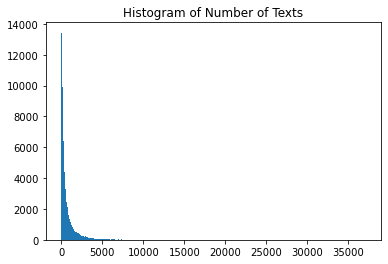

In [13]:
# Place your code here
# Place your code here
plt.hist(ads['num_texts'], bins=300)
plt.title('Histogram of Number of Texts')

8\. (1.5 Point) How would you characterize the shape of this distribution? Is there anything we can do to the texts variable to make the distribution more bell curved? 

Hint: Let's create a new column in the dataframe called `'log_num_texts'` and print a histogram `'Histogram of Log(Num Texts)'` of it. What might be some advantages of making such a transformation?

Text(0.5, 1.0, 'Histogram of Log(Num Texts)')

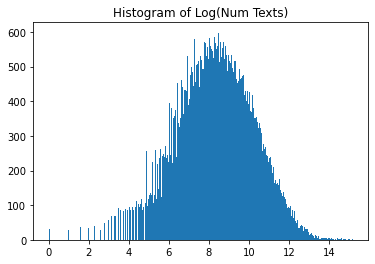

In [14]:
# Place your code and response here
temp=np.log2(ads['num_texts'])
plt.hist(temp, bins=300)
plt.title('Histogram of Log(Num Texts)')

End of Homework2